# Sales Dataset
In this data analysis we use Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

### *The Imports*

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import datetime as dt

### Concatenating all files together

In [93]:
path = 'C:/Users/unend/JupyterNoteBook/Sales Dataset/Sales_Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

sales_df = pd.concat(li, axis=0, ignore_index=True)

In [94]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Basic Information about our dataset

**Shape of our dataset**

In [82]:
sales_df.shape

(186850, 6)

**Columns in our dataset**

In [83]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**Some Basic Information about our data**

In [84]:
sales_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Clean up the data!

**Finding out the null values in our dataset**

In [85]:
sales_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

**Dropping all null values from our dataset**

In [106]:
sales_df.dropna(inplace=True)

**Checking our revised dataset**

In [107]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Find all rows with repeating and invalid data

In [96]:
sales_df[sales_df['Order ID']== 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**Remove all duplicate rows**

In [104]:
sales_df.drop(sales_df[sales_df['Order ID']== 'Order ID'].index,inplace=True)

**Checking Our Data after cleaning**

In [105]:
sales_df[sales_df['Order ID']== 'Order ID'] #no more rows satisfying the condition

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


**Finding out the data types of all Columns in our dataset**

In [108]:
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

**Update the columns to their appropriate data types**

In [111]:
sales_df['Order ID'] = pd.to_numeric(sales_df['Order ID'])
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'])
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'])
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

**Looking at the updated columns**

In [112]:
sales_df.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

**Resetting the Index**

In [120]:
sales_df.head()#index before resetting

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [127]:
sales_df.reset_index()
sales_df.head()

,level_0,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Augment data with additional columns

**Add a separate month column**

In [116]:
sales_df['Month'] = pd.to_datetime(sales_df['Order Date']).dt.month
sales_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4


**Add a separate column for city**

In [221]:
sales_df['City'] = sales_df['Purchase Address'].str.split(',').str[1] 
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99


### Data Exploration

**What was the best month for sales? How much was earned that month?**

In [172]:
sales_df.groupby(sales_df['Month']).sum()['Quantity Ordered']

Month
1     10903
2     13449
3     17005
4     20558
5     18667
6     15253
7     16072
8     13448
9     13109
10    22703
11    19798
12    28114
Name: Quantity Ordered, dtype: int64

In [175]:
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
sales_df.groupby('Month').sum()['Sales']

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

**Plot Sales per Month data**

<AxesSubplot:xlabel='Month', ylabel='Sales in USD $ (1 unit = 1000000)'>

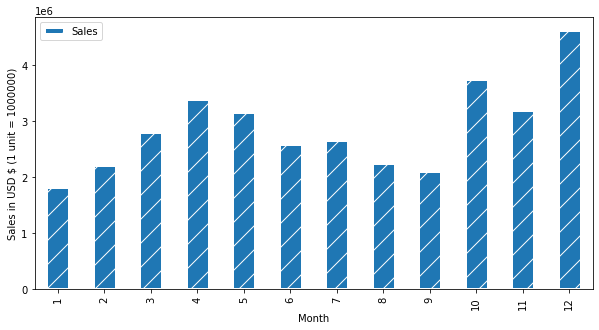

In [218]:
sales_df.groupby('Month').sum()['Sales'].plot(kind='bar',lw=3,ec='white',ylabel='Sales in USD $ (1 unit = 1000000)',hatch='/',figsize=(10,5),legend=True)

**What city sold the most product?**

In [232]:
sales_df.groupby(sales_df['City']).sum()['Quantity Ordered']

City
 Atlanta          16602
 Austin           11153
 Boston           22528
 Dallas           16730
 Los Angeles      33289
 New York City    27932
 Portland         14053
 San Francisco    50239
 Seattle          16553
Name: Quantity Ordered, dtype: int64

**Plot the above data statistics for products sold in each City**

<AxesSubplot:xlabel='City', ylabel='Quantity Sold'>

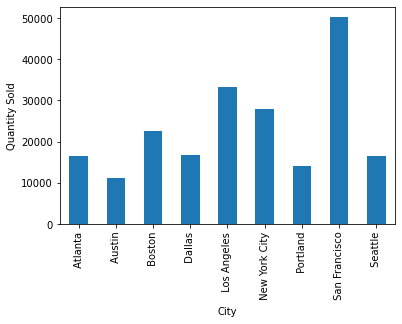

In [247]:
sales_df.groupby(sales_df['City']).sum()['Quantity Ordered'].plot(kind='bar',ylabel='Quantity Sold')

**What time should we display advertisements to maximize likelihood of customer's buying product?**

In [257]:
sales_df['Time']= sales_df['Order Date'].dt.hour

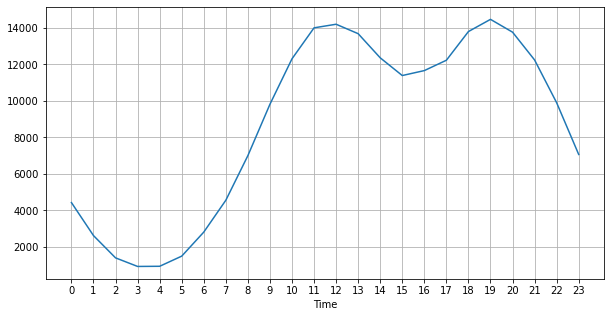

In [292]:
sales_df.groupby(sales_df['Time']).sum()['Quantity Ordered'].plot(figsize=(10,5))
plt.xticks(sales_df['Time'].unique())
plt.grid()

**Number of different types of products sold**

In [313]:
sales_df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

**Plot the Product by Quantity Ordered data**

<AxesSubplot:xlabel='Product'>

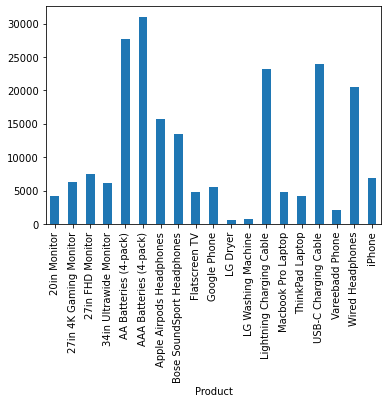

In [316]:
sales_df.groupby('Product').sum()['Quantity Ordered'].plot(kind='bar')

**Plot Separate Grids to show the sales of each product in different cities**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple Airpods Headphones'),
  Text(1, 0, 'AAA Batteries (4-pack)'),
  Text(2, 0, '34in Ultrawide Monitor'),
  Text(3, 0, 'Wired Headphones'),
  Text(4, 0, 'USB-C Charging Cable'),
  Text(5, 0, 'Lightning Charging Cable'),
  Text(6, 0, '27in FHD Monitor'),
  Text(7, 0, 'Google Phone'),
  Text(8, 0, 'AA Batteries (4-pack)'),
  Text(9, 0, 'Macbook Pro Laptop'),
  Text(10, 0, 'Bose SoundSport Headphones'),
  Text(11, 0, '20in Monitor'),
  Text(12, 0, 'Flatscreen TV'),
  Text(13, 0, 'iPhone'),
  Text(14, 0, 'Vareebadd Phone'),
  Text(15, 0, 'LG Dryer'),
  Text(16, 0, '27in 4K Gaming Monitor'),
  Text(17, 0, 'ThinkPad Laptop'),
  Text(18, 0, 'LG Washing Machine')])

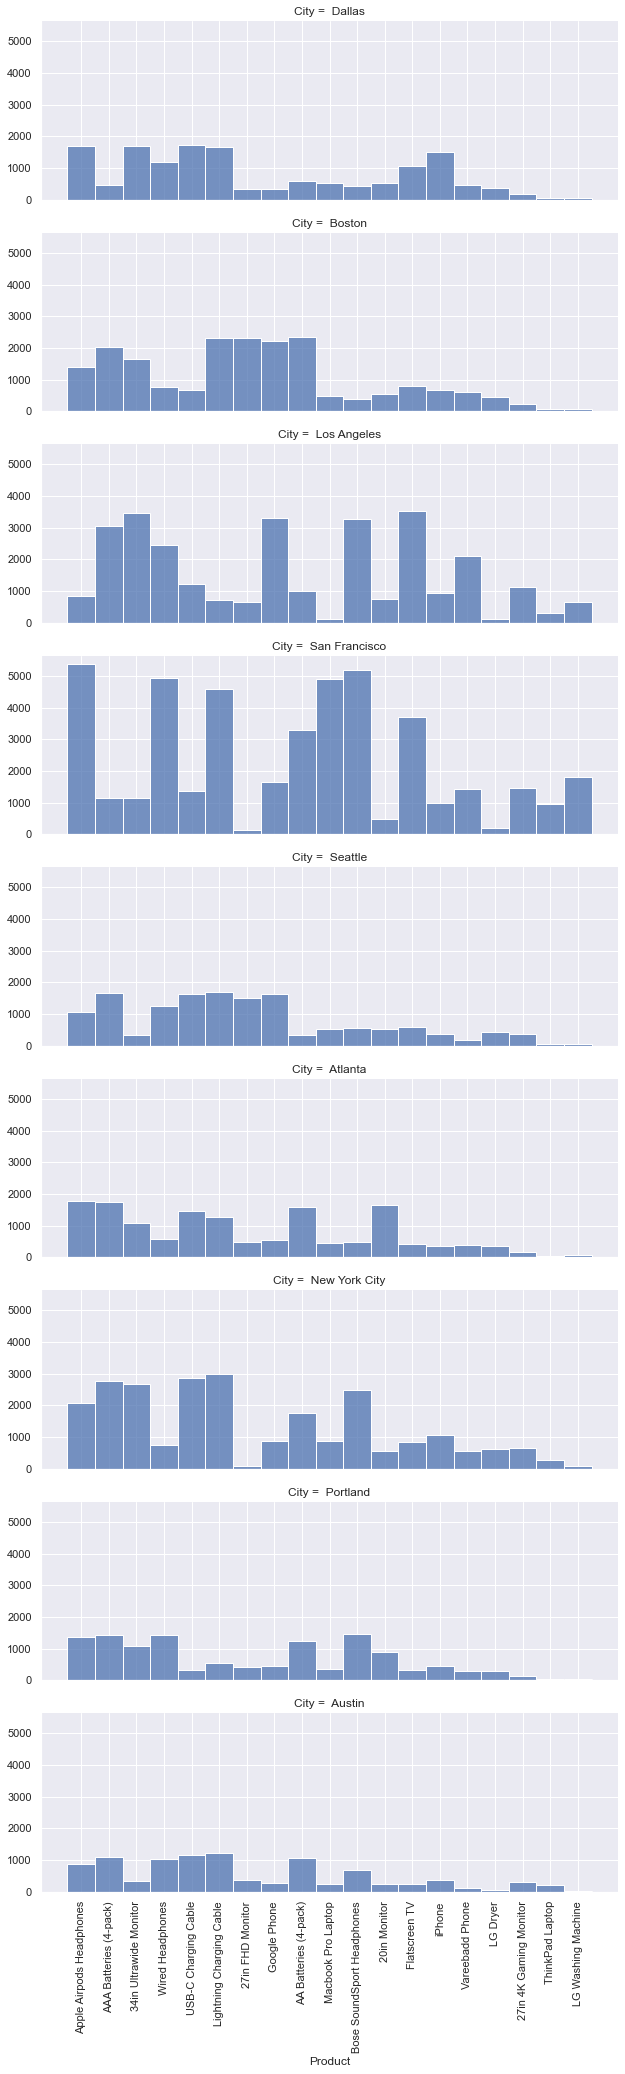

In [334]:
sns.set(font_scale=1)
g=sns.FacetGrid(sales_df,row='City',aspect=3)
g.map(sns.histplot, 'Product')
plt.xticks(rotation=90)